# LIVE MNIST 

The LIVE MNIST project aims to create an interactive and dynamic visualization of the training, validation, and testing process for the well-known MNIST dataset. Users will be able to configure the number of layers and nodes in a Convolutional Neural Network (CNN) and observe a live representation of the model’s structure and learning progress directly on a web interface. Additionally, the project will feature an interactive drawing tool where users can sketch digits in real-time and instantly see the model’s predicted probabilities for each number, making the experience both educational and engaging.

1) MODEL rep

In [75]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 6.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [93]:
train_x = "dataset/train-images.idx3-ubyte"
train_y = "dataset/train-labels.idx1-ubyte"
test_x = "dataset/t10k-images.idx3-ubyte"
test_y = "dataset/t10k-labels.idx1-ubyte"


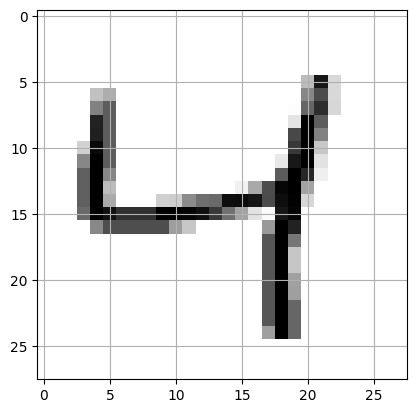

In [123]:
def cargar_mnist_imagenes(archivo, num_imagenes):
    with open(archivo, "rb") as f:
        f.read(16)  
        datos = np.frombuffer(f.read(num_imagenes * 28 * 28), dtype=np.uint8)
        return datos.reshape(num_imagenes, 28, 28)

def mostrar_imagen(pixels):
    imagen = np.array(pixels, dtype=np.uint8).reshape(28, 28)
    plt.imshow(imagen, cmap="gray_r")
    plt.axis("on")
    plt.grid(True, "major")
    plt.show()


imagenes = cargar_mnist_imagenes(train_x, num_imagenes=60000)
pruev = imagenes[2]


mostrar_imagen(pruev)

In [124]:
imagenes.shape

(60000, 28, 28)

In [125]:
image_matrix = np.array(pruev)
df = pd.DataFrame(image_matrix)
print(df.to_string(index=False, header=False))

0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232 39 0 0 0 0 0
0 0 0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180 39 0 0 0 0 0
0 0 0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210 40 0 0 0 0 0
0 0 0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  27 254 162  0 0 0 0 0 0
0 0 0   0 222 163   0   0   0   0   0   0   0   0   0   0   0   0   0 183 254 125  0 0 0 0 0 0
0 0 0  46 245 163   0   0   0   0   0   0   0   0 